### Using data from top news headlines

In [1]:
pip install vaderSentiment

    100% |████████████████████████████████| 133kB 293kB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install textblob

    100% |████████████████████████████████| 645kB 951kB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
dfNews = pd.read_csv('dow_jones_industrial_average_news.csv')
dfStock = pd.read_csv('dow_jones_industrial_average_stock.csv')

In [3]:
dfNews.head()

Date  Label                                               Top1  \
0  2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  2008-08-11      1  b'Why wont America and Nato help us? If they w...   
2  2008-08-12      0  b'Remember that adorable 9-year-old who sang a...   
3  2008-08-13      0  b' U.S. refuses Israel weapons to attack Iran:...   
4  2008-08-14      1  b'All the experts admit that we should legalis...   

                                                Top2  \
0            b'BREAKING: Musharraf to be impeached.'   
1        b'Bush puts foot down on Georgian conflict'   
2                 b"Russia 'ends Georgia operation'"   
3  b"When the president ordered to attack Tskhinv...   
4  b'War in South Osetia - 89 pictures made by a ...   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   
3  b' Israel clears troops who killed Reuters cam...   
4  b'Swedish wrestler Ara Abrahamian throws away ...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   
3  b'Britain\'s policy of being tough on drugs is...   
4  b'Russia exaggerated the death toll in South O...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   
2  b'Ceasefire in Georgia: Putin Outmaneuvers the...   
3  b'Body of 14 year old found in trunk; Latest (...   
4  b'Missile That Killed 9 Inside Pakistan May Ha...   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   
2  b'Why Microsoft and Intel tried to kill the XO...   
3  b'China has moved 10 *million* quake survivors...   
4  b"Rushdie Condemns Random House's Refusal to P...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   
2  b'Stratfor: The Russo-Georgian War and the Bal...   
3  b"Bush announces Operation Get All Up In Russi...   
4  b'Poland and US agree to missle defense deal. ...   

                                                Top8  ...  \
0  b"The 'enemy combatent' trials are nothing but...  ...   
1  b'An American citizen living in S.Ossetia blam...  ...   
2  b"I'm Trying to Get a Sense of This Whole Geor...  ...   
3             b'Russian forces sink Georgian ships '  ...   
4  b'Will the Russians conquer Tblisi? Bet on it,...  ...   

                                               Top16  \
0  b'Georgia Invades South Ossetia - if Russia ge...   
1  b'Israel and the US behind the Georgian aggres...   
2  b'U.S. troops still in Georgia (did you know t...   
3                      b'Elephants extinct by 2020?'   
4  b'Bank analyst forecast Georgian crisis 2 days...   

                                               Top17  \
0                b'Al-Qaeda Faces Islamist Backlash'   
1  b'"Do not believe TV, neither Russian nor Geor...   
2       b'Why Russias response to Georgia was right'   
3  b'US humanitarian missions soon in Georgia - i...   
4  b"Georgia confict could set back Russia's US r...   

                                               Top18  \
0  b'Condoleezza Rice: "The US would not act to p...   
1  b'Riots are still going on in Montreal (Canada...   
2  b'Gorbachev accuses U.S. of making a "serious ...   
3             b"Georgia's DDOS came from US sources"   
4  b'War in the Caucasus is as much the product o...   

                                               Top19  \
0  b'This is a busy day:  The European Union has ...   
1    b'China to overtake US as largest manufac

In [4]:
dfNews.tail()

Date  Label                                               Top1  \
1984  2016-06-27      0  Barclays and RBS shares suspended from trading...   
1985  2016-06-28      1  2,500 Scientists To Australia: If You Want To ...   
1986  2016-06-29      1                   Explosion At Airport In Istanbul   
1987  2016-06-30      1  Jamaica proposes marijuana dispensers for tour...   
1988  2016-07-01      1  A 117-year-old woman in Mexico City finally re...   

                                                   Top2  \
1984  Pope says Church should ask forgiveness from g...   
1985  The personal details of 112,000 French police ...   
1986  Yemeni former president: Terrorism is the offs...   
1987  Stephen Hawking says pollution and 'stupidity'...   
1988   IMF chief backs Athens as permanent Olympic host   

                                                   Top3  \
1984  Poland 'shocked' by xenophobic abuse of Poles ...   
1985  S&amp;P cuts United Kingdom sovereign credit r...   
1986  UK must accept freedom of movement to access E...   
1987  Boris Johnson says he will not run for Tory pa...   
1988  The president of France says if Brexit won, so...   

                                                   Top4  \
1984  There will be no second referendum, cabinet ag...   
1985                Huge helium deposit found in Africa   
1986  Devastated: scientists too late to captive bre...   
1987  Six gay men in Ivory Coast were abused and for...   
1988  British Man Who Must Give Police 24 Hours' Not...   

                                                   Top5  \
1984      Scotland welcome to join EU, Merkel ally says   
1985  CEO of the South African state broadcaster qui...   
1986  British Labor Party leader Jeremy Corbyn loses...   
1987  Switzerland denies citizenship to Muslim immig...   
1988  100+ Nobel laureates urge Greenpeace to stop o...   

                                                   Top6  \
1984  Sterling dips below Friday's 31-year low amid ...   
1985  Brexit cost investors $2 trillion, the worst o...   
1986  A Muslim Shop in the UK Was Just Firebombed Wh...   
1987  Palestinian terrorist stabs israeli teen girl ...   
1988  Brazil: Huge spike in number of police killing...   

                                                   Top7  \
1984  No negative news about South African President...   
1985  Hong Kong democracy activists call for return ...   
1986  Mexican Authorities Sexually Torture Women in ...   
1987  Puerto Rico will default on $1 billion of debt...   
1988  Austria's highest court annuls presidential el...   

                                                   Top8  ...  \
1984  Surge in Hate Crimes in the U.K. Following U.K...  ...   
1985  Brexit: Iceland president says UK can join 'tr...  ...   
1986            UK shares and pound continue to recover  ...   
1987  Republic of Ireland fans to be awarded medal f...  ...   
1988  Facebook wins privacy case, can track any Belg...  ...   

                                                  Top16  \
1984  German lawyers to probe Erdogan over alleged w...   
1985  US, Canada and Mexico pledge 50% of power from...   
1986  Escape Tunnel, Dug by Hand, Is Found at Holoca...   
1987  Googles free wifi at Indian railway stations i...   
1988  The United States has placed Myanmar, Uzbekist...   

                                                  Top17  \
1984  Boris Johnson says the UK will continue to "in...   
1985  There is increasing evidence that Australia is...   
1986  The land under Beijing is sinking by as much a...   
1987  Mounting evidence suggests 'hobbits' were wipe...   
1988  S&amp;P revises European Union credit rating t...   

                                                  Top18  \
1984  Richard Branson is calling on the UK governmen...   
1985  Richard Branson, the founder of Virgin Group, ...   
1986  Car bomb and Anti-Islamic attack on Mosque in ...   
1987  The men who carried out Tuesday's terror attac...   
1988  India gets $1 bil

In [5]:
dfStock.head()

Date          Open          High           Low         Close  \
0  2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   
1  2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   
2  2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688   
3  2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703   
4  2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234   

      Volume     Adj Close  
0   82160000  17949.369141  
1  133030000  17929.990234  
2  106380000  17694.679688  
3  112190000  17409.720703  
4  138740000  17140.240234

In [6]:
dfStock.tail()

Date          Open          High           Low         Close  \
1984  2008-08-14  11532.070312  11718.280273  11450.889648  11615.929688   
1985  2008-08-13  11632.809570  11633.780273  11453.339844  11532.959961   
1986  2008-08-12  11781.700195  11782.349609  11601.519531  11642.469727   
1987  2008-08-11  11729.669922  11867.110352  11675.530273  11782.349609   
1988  2008-08-08  11432.089844  11759.959961  11388.040039  11734.320312   

         Volume     Adj Close  
1984  159790000  11615.929688  
1985  182550000  11532.959961  
1986  173590000  11642.469727  
1987  183190000  11782.349609  
1988  212830000  11734.320312

In [7]:
dfNews.shape

(1989, 27)

In [8]:
dfStock.shape

(1989, 7)

## create our dataset by merging the two datasets

In [9]:
merge = dfNews.merge(dfStock, how='inner', on='Date', right_index=True)
merge.head(3)

Date  Label                                               Top1  \
0  2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  2008-08-11      1  b'Why wont America and Nato help us? If they w...   
2  2008-08-12      0  b'Remember that adorable 9-year-old who sang a...   

                                          Top2  \
0      b'BREAKING: Musharraf to be impeached.'   
1  b'Bush puts foot down on Georgian conflict'   
2           b"Russia 'ends Georgia operation'"   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   
2  b'Ceasefire in Georgia: Putin Outmaneuvers the...   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   
2  b'Why Microsoft and Intel tried to kill the XO...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   
2  b'Stratfor: The Russo-Georgian War and the Bal...   

                                                Top8  ...  \
0  b"The 'enemy combatent' trials are nothing but...  ...   
1  b'An American citizen living in S.Ossetia blam...  ...   
2  b"I'm Trying to Get a Sense of This Whole Geor...  ...   

                                               Top22  \
0  b'Caucasus in crisis: Georgia invades South Os...   
1  b' Russia has just beaten the United States ov...   
2  b'All signs point to the US encouraging Georgi...   

                                               Top23  \
0  b'Indian shoe manufactory  - And again in a se...   
1  b'Perhaps *the* question about the Georgia - R...   
2  b'Christopher King argues that the US and NATO...   

                                               Top24  \
0  b'Visitors Suffering from Mental Illnesses Ban...   
1                 b'Russia is so much better at war'   
2                        b'America: The New Mexico?'   

                                               Top25          Open  \
0           b"No Help for Mexico's Kidnapping Surge"  11432.089844   
1  b"So this is what it's come to: trading sex fo...  11729.669922   
2  b"BBC NEWS | Asia-Pacific | Extinction 'by man...  11781.700195   

           High           Low         Close     Volume     Adj Close  
0  11759.959961  11388.040039  11734.320312  212830000  11734.320312  
1  11867.110352  11675.530273  11782.349609  183190000  11782.349609  
2  11782.349609  11601.519531  11642.469727  173590000  11642.469727  

[3 rows x 33 columns]

In [10]:
headlines = []

for row in range(0, len(merge)):
    headlines.append(' '.join(str(x) for x in merge.iloc[row, 2: 27]))

In [11]:
headlines

['b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\

In [12]:
headlines[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

## Clean the merged dataset and add it back to the merged dataset with a new column "combined_news"

In [13]:
clean_headlines = []

# replace the b's and the slashes with empy strings
for i in range(0, len(headlines)):
    clean_headlines.append(re.sub("b[(')]", '', headlines[i])) # Removes b's with single quote
    clean_headlines[i] = re.sub('b[(")]', '', clean_headlines[i]) # remove the b's with double quote
    clean_headlines[i] = re.sub("\'", '', clean_headlines[i]) # remove the "\'"

In [14]:
clean_headlines

['Georgia downs two Russian warplanes as countries move to brink of war" BREAKING: Musharraf to be impeached. Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube) Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire Afghan children raped with impunity, U.N. official says - this is sick, a three year old was raped and they do nothing" 150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets. Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SOs side" The enemy combatent trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO] Did the U.S. Prep Georgia for War with Russia? Rice Gives Green Light for Israel to Attack Iran: 

In [15]:
clean_headlines[0]

'Georgia downs two Russian warplanes as countries move to brink of war" BREAKING: Musharraf to be impeached. Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube) Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire Afghan children raped with impunity, U.N. official says - this is sick, a three year old was raped and they do nothing" 150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets. Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SOs side" The enemy combatent trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO] Did the U.S. Prep Georgia for War with Russia? Rice Gives Green Light for Israel to Attack Iran: S

In [16]:
merge['combined_news'] = clean_headlines
merge['combined_news'][0]

'Georgia downs two Russian warplanes as countries move to brink of war" BREAKING: Musharraf to be impeached. Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube) Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire Afghan children raped with impunity, U.N. official says - this is sick, a three year old was raped and they do nothing" 150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets. Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SOs side" The enemy combatent trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO] Did the U.S. Prep Georgia for War with Russia? Rice Gives Green Light for Israel to Attack Iran: S

In [17]:
merge.head()

Date  Label                                               Top1  \
0  2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  2008-08-11      1  b'Why wont America and Nato help us? If they w...   
2  2008-08-12      0  b'Remember that adorable 9-year-old who sang a...   
3  2008-08-13      0  b' U.S. refuses Israel weapons to attack Iran:...   
4  2008-08-14      1  b'All the experts admit that we should legalis...   

                                                Top2  \
0            b'BREAKING: Musharraf to be impeached.'   
1        b'Bush puts foot down on Georgian conflict'   
2                 b"Russia 'ends Georgia operation'"   
3  b"When the president ordered to attack Tskhinv...   
4  b'War in South Osetia - 89 pictures made by a ...   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   
3  b' Israel clears troops who killed Reuters cam...   
4  b'Swedish wrestler Ara Abrahamian throws away ...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   
3  b'Britain\'s policy of being tough on drugs is...   
4  b'Russia exaggerated the death toll in South O...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   
2  b'Ceasefire in Georgia: Putin Outmaneuvers the...   
3  b'Body of 14 year old found in trunk; Latest (...   
4  b'Missile That Killed 9 Inside Pakistan May Ha...   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   
2  b'Why Microsoft and Intel tried to kill the XO...   
3  b'China has moved 10 *million* quake survivors...   
4  b"Rushdie Condemns Random House's Refusal to P...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   
2  b'Stratfor: The Russo-Georgian War and the Bal...   
3  b"Bush announces Operation Get All Up In Russi...   
4  b'Poland and US agree to missle defense deal. ...   

                                                Top8  ...  \
0  b"The 'enemy combatent' trials are nothing but...  ...   
1  b'An American citizen living in S.Ossetia blam...  ...   
2  b"I'm Trying to Get a Sense of This Whole Geor...  ...   
3             b'Russian forces sink Georgian ships '  ...   
4  b'Will the Russians conquer Tblisi? Bet on it,...  ...   

                                               Top23  \
0  b'Indian shoe manufactory  - And again in a se...   
1  b'Perhaps *the* question about the Georgia - R...   
2  b'Christopher King argues that the US and NATO...   
3  b' Quarter of Russians blame U.S. for conflict...   
4  b'Russia: World  "can forget about" Georgia\'s...   

                                               Top24  \
0  b'Visitors Suffering from Mental Illnesses Ban...   
1                 b'Russia is so much better at war'   
2                        b'America: The New Mexico?'   
3  b'Georgian president  says US military will ta...   
4  b'Darfur rebels accuse Sudan of mounting major...   

                                               Top25          Open  \
0           b"No Help for Mexico's Kidnapping Surge"  11432.089844   
1  b"So this is what it's come to: trading sex fo...  11729.669922   
2  b"BBC NEWS | Asia-Pacific | Extinction 'by man...  11781.700195   
3  b'2006: Nobel laureate Aleksander Solzhenitsyn...  11632.809570   
4  b'Philippines : Peace Advocate say Muslims nee...  11532.070312   

           High           Low         Close     Volume     Adj Close  \
0 

## Create a function to deduce opinion/sentiment and polarity (+ve or -ve value) of the text

In [18]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [19]:
# Create two new columns 'Subjectivity' and 'Polarity'
merge['Subjectivity'] = merge['combined_news'].apply(getSubjectivity)
merge['Polarity'] = merge['combined_news'].apply(getPolarity)

In [20]:
merge.head()

Date  Label                                               Top1  \
0  2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  2008-08-11      1  b'Why wont America and Nato help us? If they w...   
2  2008-08-12      0  b'Remember that adorable 9-year-old who sang a...   
3  2008-08-13      0  b' U.S. refuses Israel weapons to attack Iran:...   
4  2008-08-14      1  b'All the experts admit that we should legalis...   

                                                Top2  \
0            b'BREAKING: Musharraf to be impeached.'   
1        b'Bush puts foot down on Georgian conflict'   
2                 b"Russia 'ends Georgia operation'"   
3  b"When the president ordered to attack Tskhinv...   
4  b'War in South Osetia - 89 pictures made by a ...   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   
3  b' Israel clears troops who killed Reuters cam...   
4  b'Swedish wrestler Ara Abrahamian throws away ...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   
3  b'Britain\'s policy of being tough on drugs is...   
4  b'Russia exaggerated the death toll in South O...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   
2  b'Ceasefire in Georgia: Putin Outmaneuvers the...   
3  b'Body of 14 year old found in trunk; Latest (...   
4  b'Missile That Killed 9 Inside Pakistan May Ha...   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   
2  b'Why Microsoft and Intel tried to kill the XO...   
3  b'China has moved 10 *million* quake survivors...   
4  b"Rushdie Condemns Random House's Refusal to P...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   
2  b'Stratfor: The Russo-Georgian War and the Bal...   
3  b"Bush announces Operation Get All Up In Russi...   
4  b'Poland and US agree to missle defense deal. ...   

                                                Top8  ...  \
0  b"The 'enemy combatent' trials are nothing but...  ...   
1  b'An American citizen living in S.Ossetia blam...  ...   
2  b"I'm Trying to Get a Sense of This Whole Geor...  ...   
3             b'Russian forces sink Georgian ships '  ...   
4  b'Will the Russians conquer Tblisi? Bet on it,...  ...   

                                               Top25          Open  \
0           b"No Help for Mexico's Kidnapping Surge"  11432.089844   
1  b"So this is what it's come to: trading sex fo...  11729.669922   
2  b"BBC NEWS | Asia-Pacific | Extinction 'by man...  11781.700195   
3  b'2006: Nobel laureate Aleksander Solzhenitsyn...  11632.809570   
4  b'Philippines : Peace Advocate say Muslims nee...  11532.070312   

           High           Low         Close     Volume     Adj Close  \
0  11759.959961  11388.040039  11734.320312  212830000  11734.320312   
1  11867.110352  11675.530273  11782.349609  183190000  11782.349609   
2  11782.349609  11601.519531  11642.469727  173590000  11642.469727   
3  11633.780273  11453.339844  11532.959961  182550000  11532.959961   
4  11718.280273  11450.889648  11615.929688  159790000  11615.929688   

                                       combined_news Subjectivity  Polarity  
0  Georgia downs two Russian warplanes as countri...     0.267549 -0.048568  
1  Why wont America and Nato help us? If they won...     0.374806  0.121956  
2  Remember that adorable 9-year-old who sang at ...     0.536234 -0.044302  
3  

In [21]:
def getSentimentAnalyzer(text):
    sentimentIntensityAnalyzer = SentimentIntensityAnalyzer()
    sentiment = sentimentIntensityAnalyzer.polarity_scores(text)
    return sentiment

In [22]:
# Get the Sentiment score for each day
# Compund: A score/metrics that calculates the sum of all the lexical ratings which have been normalized.
# between -1 and +1 ,i.e, most extreme -ve and most extrem +ve one
compound = []
negative = []
positive = []
neutral = []
SIA = 0

for i in range(0, len(merge['combined_news'])):
    SIA = getSentimentAnalyzer(merge['combined_news'][i])
    compound.append(SIA['compound'])
    negative.append(SIA['neg'])
    neutral.append(SIA['neu'])
    positive.append(SIA['pos'])

In [23]:
# Store the sentiment score and merged dataset
merge['Compound'] = compound
merge['Negative'] = negative
merge['Neutral'] = neutral
merge['Positive'] = positive

In [24]:
merge.head()

Date  Label                                               Top1  \
0  2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  2008-08-11      1  b'Why wont America and Nato help us? If they w...   
2  2008-08-12      0  b'Remember that adorable 9-year-old who sang a...   
3  2008-08-13      0  b' U.S. refuses Israel weapons to attack Iran:...   
4  2008-08-14      1  b'All the experts admit that we should legalis...   

                                                Top2  \
0            b'BREAKING: Musharraf to be impeached.'   
1        b'Bush puts foot down on Georgian conflict'   
2                 b"Russia 'ends Georgia operation'"   
3  b"When the president ordered to attack Tskhinv...   
4  b'War in South Osetia - 89 pictures made by a ...   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   
3  b' Israel clears troops who killed Reuters cam...   
4  b'Swedish wrestler Ara Abrahamian throws away ...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   
3  b'Britain\'s policy of being tough on drugs is...   
4  b'Russia exaggerated the death toll in South O...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   
2  b'Ceasefire in Georgia: Putin Outmaneuvers the...   
3  b'Body of 14 year old found in trunk; Latest (...   
4  b'Missile That Killed 9 Inside Pakistan May Ha...   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   
2  b'Why Microsoft and Intel tried to kill the XO...   
3  b'China has moved 10 *million* quake survivors...   
4  b"Rushdie Condemns Random House's Refusal to P...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   
2  b'Stratfor: The Russo-Georgian War and the Bal...   
3  b"Bush announces Operation Get All Up In Russi...   
4  b'Poland and US agree to missle defense deal. ...   

                                                Top8  ...         Close  \
0  b"The 'enemy combatent' trials are nothing but...  ...  11734.320312   
1  b'An American citizen living in S.Ossetia blam...  ...  11782.349609   
2  b"I'm Trying to Get a Sense of This Whole Geor...  ...  11642.469727   
3             b'Russian forces sink Georgian ships '  ...  11532.959961   
4  b'Will the Russians conquer Tblisi? Bet on it,...  ...  11615.929688   

      Volume     Adj Close                                      combined_news  \
0  212830000  11734.320312  Georgia downs two Russian warplanes as countri...   
1  183190000  11782.349609  Why wont America and Nato help us? If they won...   
2  173590000  11642.469727  Remember that adorable 9-year-old who sang at ...   
3  182550000  11532.959961   U.S. refuses Israel weapons to attack Iran: r...   
4  159790000  11615.929688  All the experts admit that we should legalise ...   

  Subjectivity  Polarity Compound Negative Neutral Positive  
0     0.267549 -0.048568  -0.9982    0.235   0.724    0.041  
1     0.374806  0.121956  -0.9858    0.191   0.721    0.089  
2     0.536234 -0.044302  -0.9715    0.128   0.816    0.056  
3     0.364021  0.011398  -0.9809    0.146   0.788    0.066  
4     0.375099  0.040677  -0.9882    0.189   0.717    0.094  

[5 rows x 40 columns]

## Collapse the dataset and create a list (new dataset) of columns to keep and use with the model

In [25]:
keep_columns = [
    'Open', 'High', 'Low', 'Volume', 'Subjectivity', 'Polarity', 
    'Compound', 'Negative', 'Neutral', 'Positive', 'Label'
]
df = merge[keep_columns]

In [26]:
df

Open          High           Low     Volume  Subjectivity  \
0     11432.089844  11759.959961  11388.040039  212830000      0.267549   
1     11729.669922  11867.110352  11675.530273  183190000      0.374806   
2     11781.700195  11782.349609  11601.519531  173590000      0.536234   
3     11632.809570  11633.780273  11453.339844  182550000      0.364021   
4     11532.070312  11718.280273  11450.889648  159790000      0.375099   
5     11611.209961  11709.889648  11599.730469  215040000      0.457692   
6     11659.650391  11690.429688  11434.120117  156290000      0.485995   
7     11478.089844  11478.169922  11318.500000  171580000      0.345230   
8     11345.940430  11454.150391  11290.580078  144880000      0.218470   
9     11415.230469  11476.209961  11315.570312  130020000      0.258333   
10    11426.790039  11632.129883  11426.790039  138790000      0.308712   
11    11626.190430  11626.269531  11362.629883  148610000      0.513259   
12    11383.559570  11436.240234  11340.410156  119800000      0.376190   
13    11412.459961  11554.459961  11381.769531  120580000      0.366228   
14    11499.870117  11715.179688  11499.790039  149150000      0.229018   
15    11713.230469  11713.230469  11543.389648  166910000      0.306818   
16    11545.629883  11790.169922  11471.900391  177090000      0.349702   
17    11506.009766  11554.379883  11416.530273  174250000      0.290689   
18    11532.480469  11532.480469  11176.019531  229200000      0.370455   
19    11185.629883  11245.150391  11037.849609  198300000      0.299286   
20    11224.870117  11570.660156  11224.790039  273000000      0.335584   
21    11514.730469  11577.500000  11230.730469  257300000      0.406191   
22    11233.910156  11380.629883  11215.259766  214260000      0.475595   
23    11264.440430  11445.679688  11098.669922  247820000      0.353929   
24    11429.320312  11459.929688  11280.400391  238890000      0.364273   
25    11416.370117  11416.450195  10917.509766  432970000      0.359874   
26    10905.620117  11093.219727  10742.700195  494760000      0.439506   
27    11056.580078  11057.309570  10595.900391  463200000      0.365038   
28    10609.009766  11076.440430  10459.440430  488060000      0.410606   
29    11027.509766  11483.049805  11026.700195  655110000      0.387500   
...            ...           ...           ...        ...           ...   
1959  17437.320312  17571.750000  17437.320312  111990000      0.345850   
1960  17507.039062  17550.699219  17480.050781   87790000      0.379175   
1961  17525.189453  17742.589844  17525.189453   86480000      0.451149   
1962  17735.089844  17891.710938  17735.089844   79180000      0.403186   
1963  17859.519531  17888.660156  17803.820312   68940000      0.380946   
1964  17826.849609  17873.220703  17824.730469   73190000      0.380604   
1965  17891.500000  17899.240234  17724.029297  147390000      0.354810   
1966  17754.550781  17809.179688  17664.789062   78530000      0.334315   
1967  17789.050781  17838.560547  17703.550781   75560000      0.399837   
1968  17799.800781  17833.169922  17689.679688   82270000      0.395833   
1969  17825.689453  17949.679688  17822.810547   71870000      0.316254   
1970  17936.220703  18003.230469  17936.220703   78750000      0.370172   
1971  17931.910156  18016.000000  17931.910156   71260000      0.371740   
1972  17969.980469  18005.220703  17915.880859   69690000      0.353835   
1973  17938.820312  17938.820312  17812.339844   90540000      0.356181   
1974  17830.500000  17893.279297  17731.349609  101690000      0.389222   
1975  17710.769531  17733.919922  17595.789062   93740000      0.404675   
1976  17703.650391  17762.960938  17629.009766   94130000      0.322965   
1977  17602.230469  17754.910156  17471.289062   91950000      0.346453   
1978  17733.439453  17733.439453  17602.779297  248680000      0.335994   
1979  17736.869141  17946.359375  17736.869141   99380000      0.342441   
1980  17827.330078  17877.839844  17799

In [27]:
op = df['Open']
p = df['Positive']
ne = df['Neutral']
n = df['Negative']

In [28]:
op

0       11432.089844
1       11729.669922
2       11781.700195
3       11632.809570
4       11532.070312
5       11611.209961
6       11659.650391
7       11478.089844
8       11345.940430
9       11415.230469
10      11426.790039
11      11626.190430
12      11383.559570
13      11412.459961
14      11499.870117
15      11713.230469
16      11545.629883
17      11506.009766
18      11532.480469
19      11185.629883
20      11224.870117
21      11514.730469
22      11233.910156
23      11264.440430
24      11429.320312
25      11416.370117
26      10905.620117
27      11056.580078
28      10609.009766
29      11027.509766
            ...     
1959    17437.320312
1960    17507.039062
1961    17525.189453
1962    17735.089844
1963    17859.519531
1964    17826.849609
1965    17891.500000
1966    17754.550781
1967    17789.050781
1968    17799.800781
1969    17825.689453
1970    17936.220703
1971    17931.910156
1972    17969.980469
1973    17938.820312
1974    17830.500000
1975    17710

In [29]:
import matplotlib.pyplot as plt

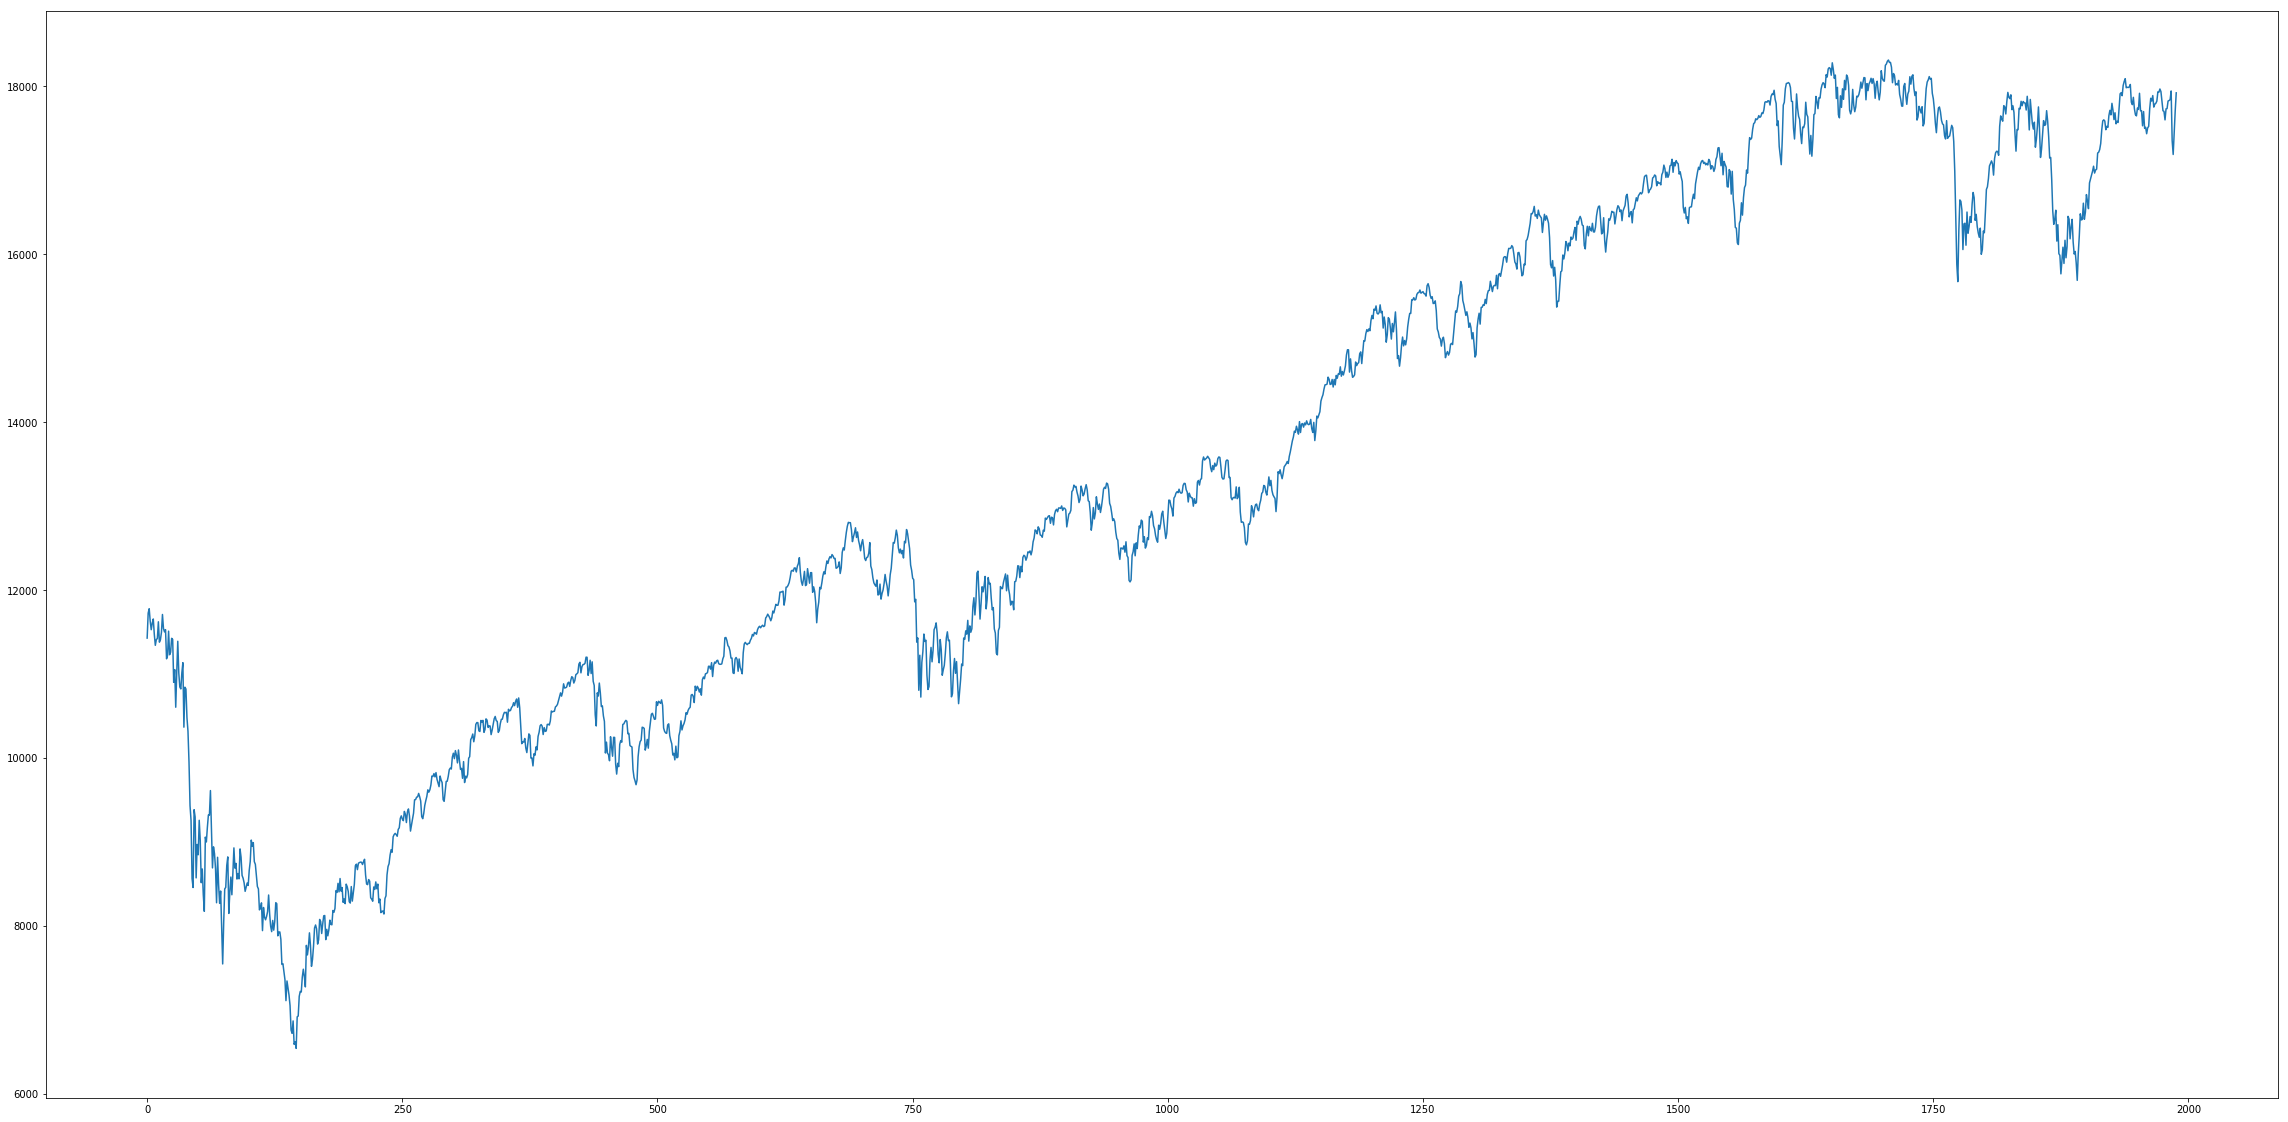

In [30]:
plt.figure(figsize=(40,20))
plt.plot(op)

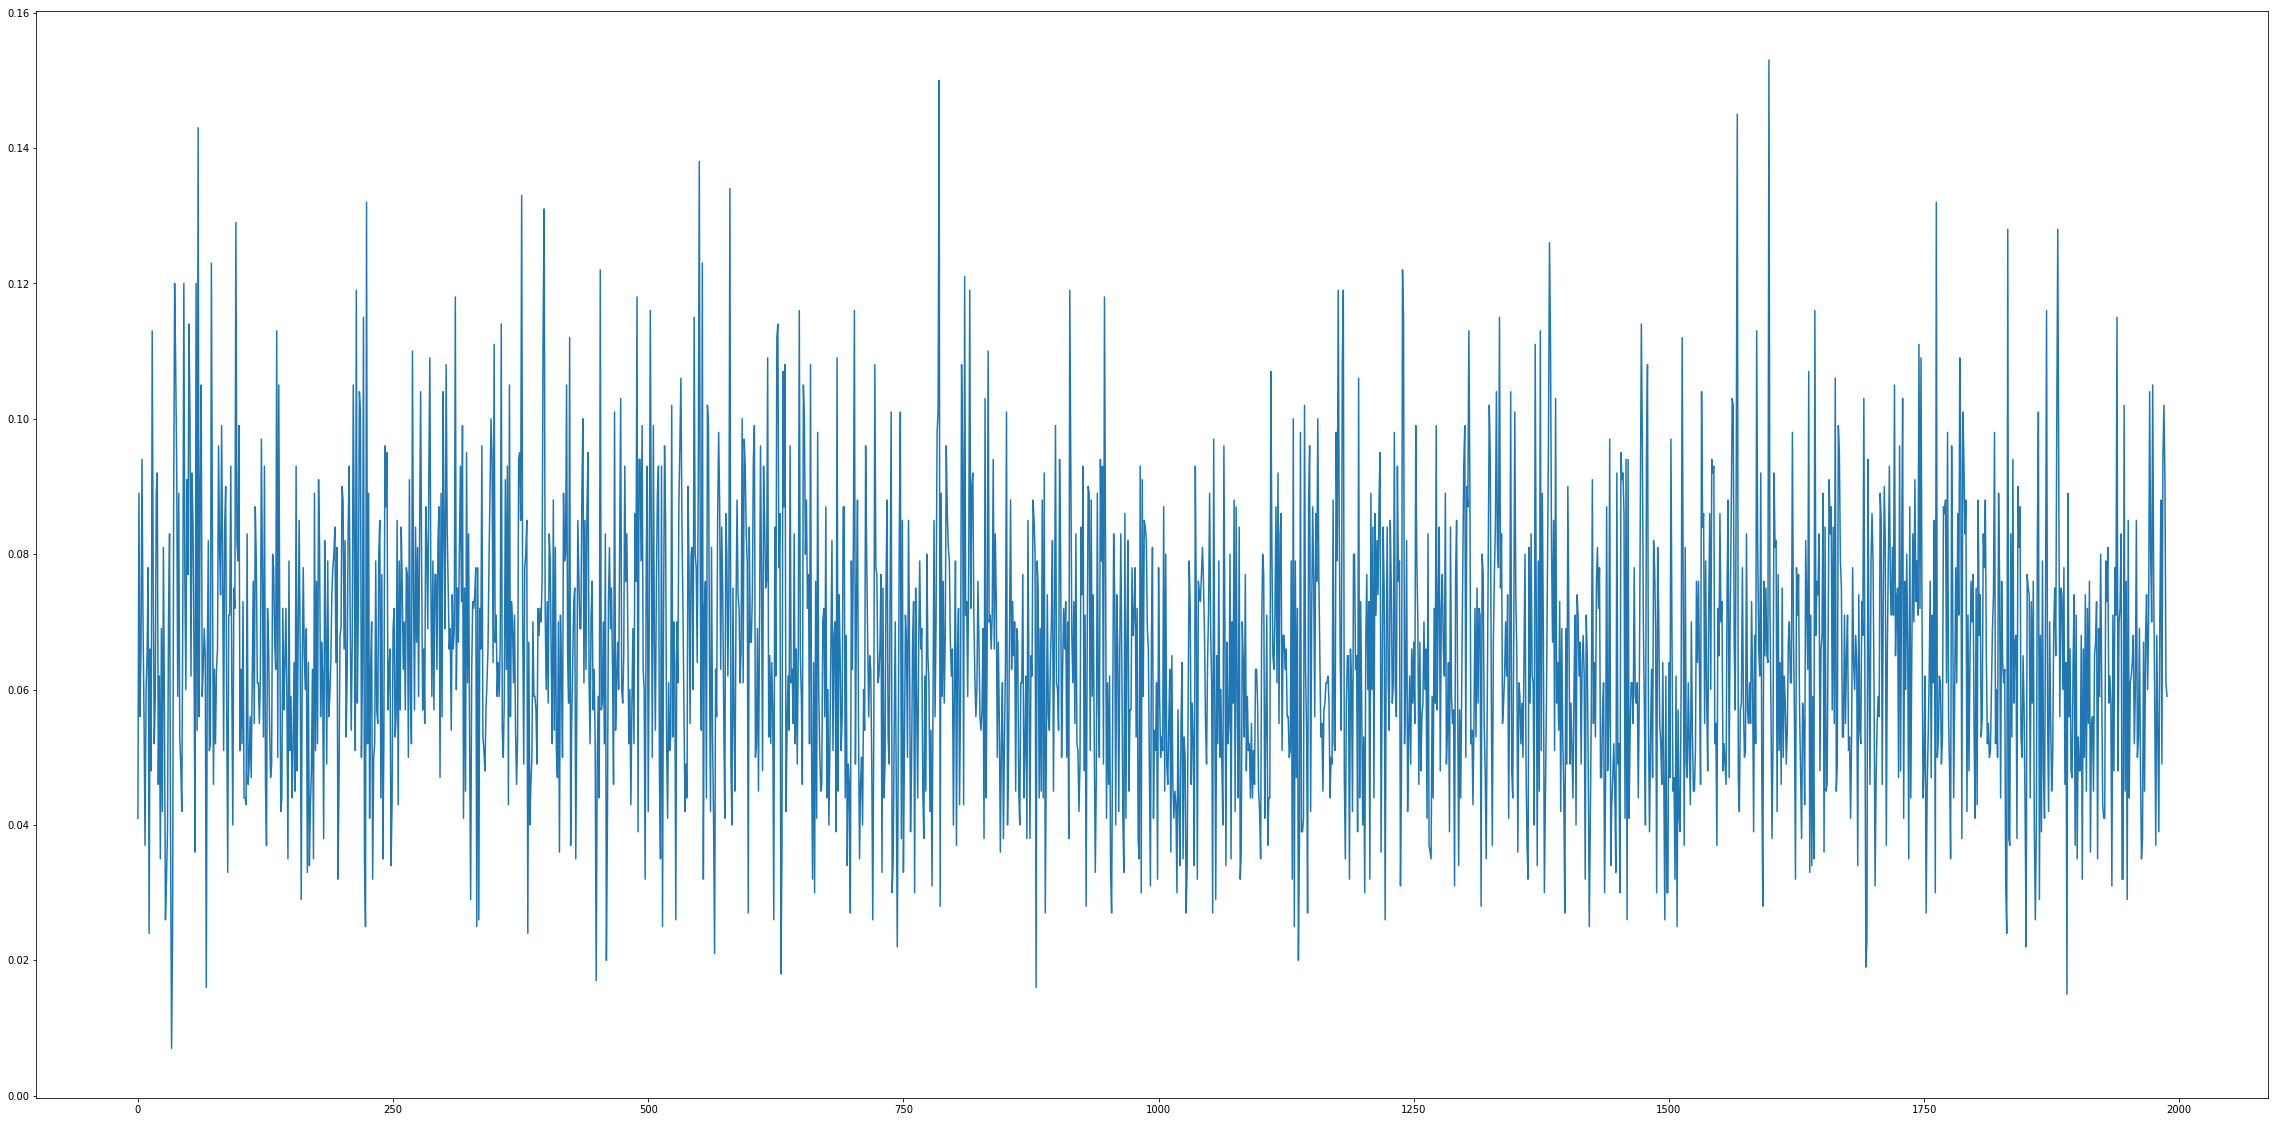

In [31]:
plt.figure(figsize=(40,20))
plt.plot(p)

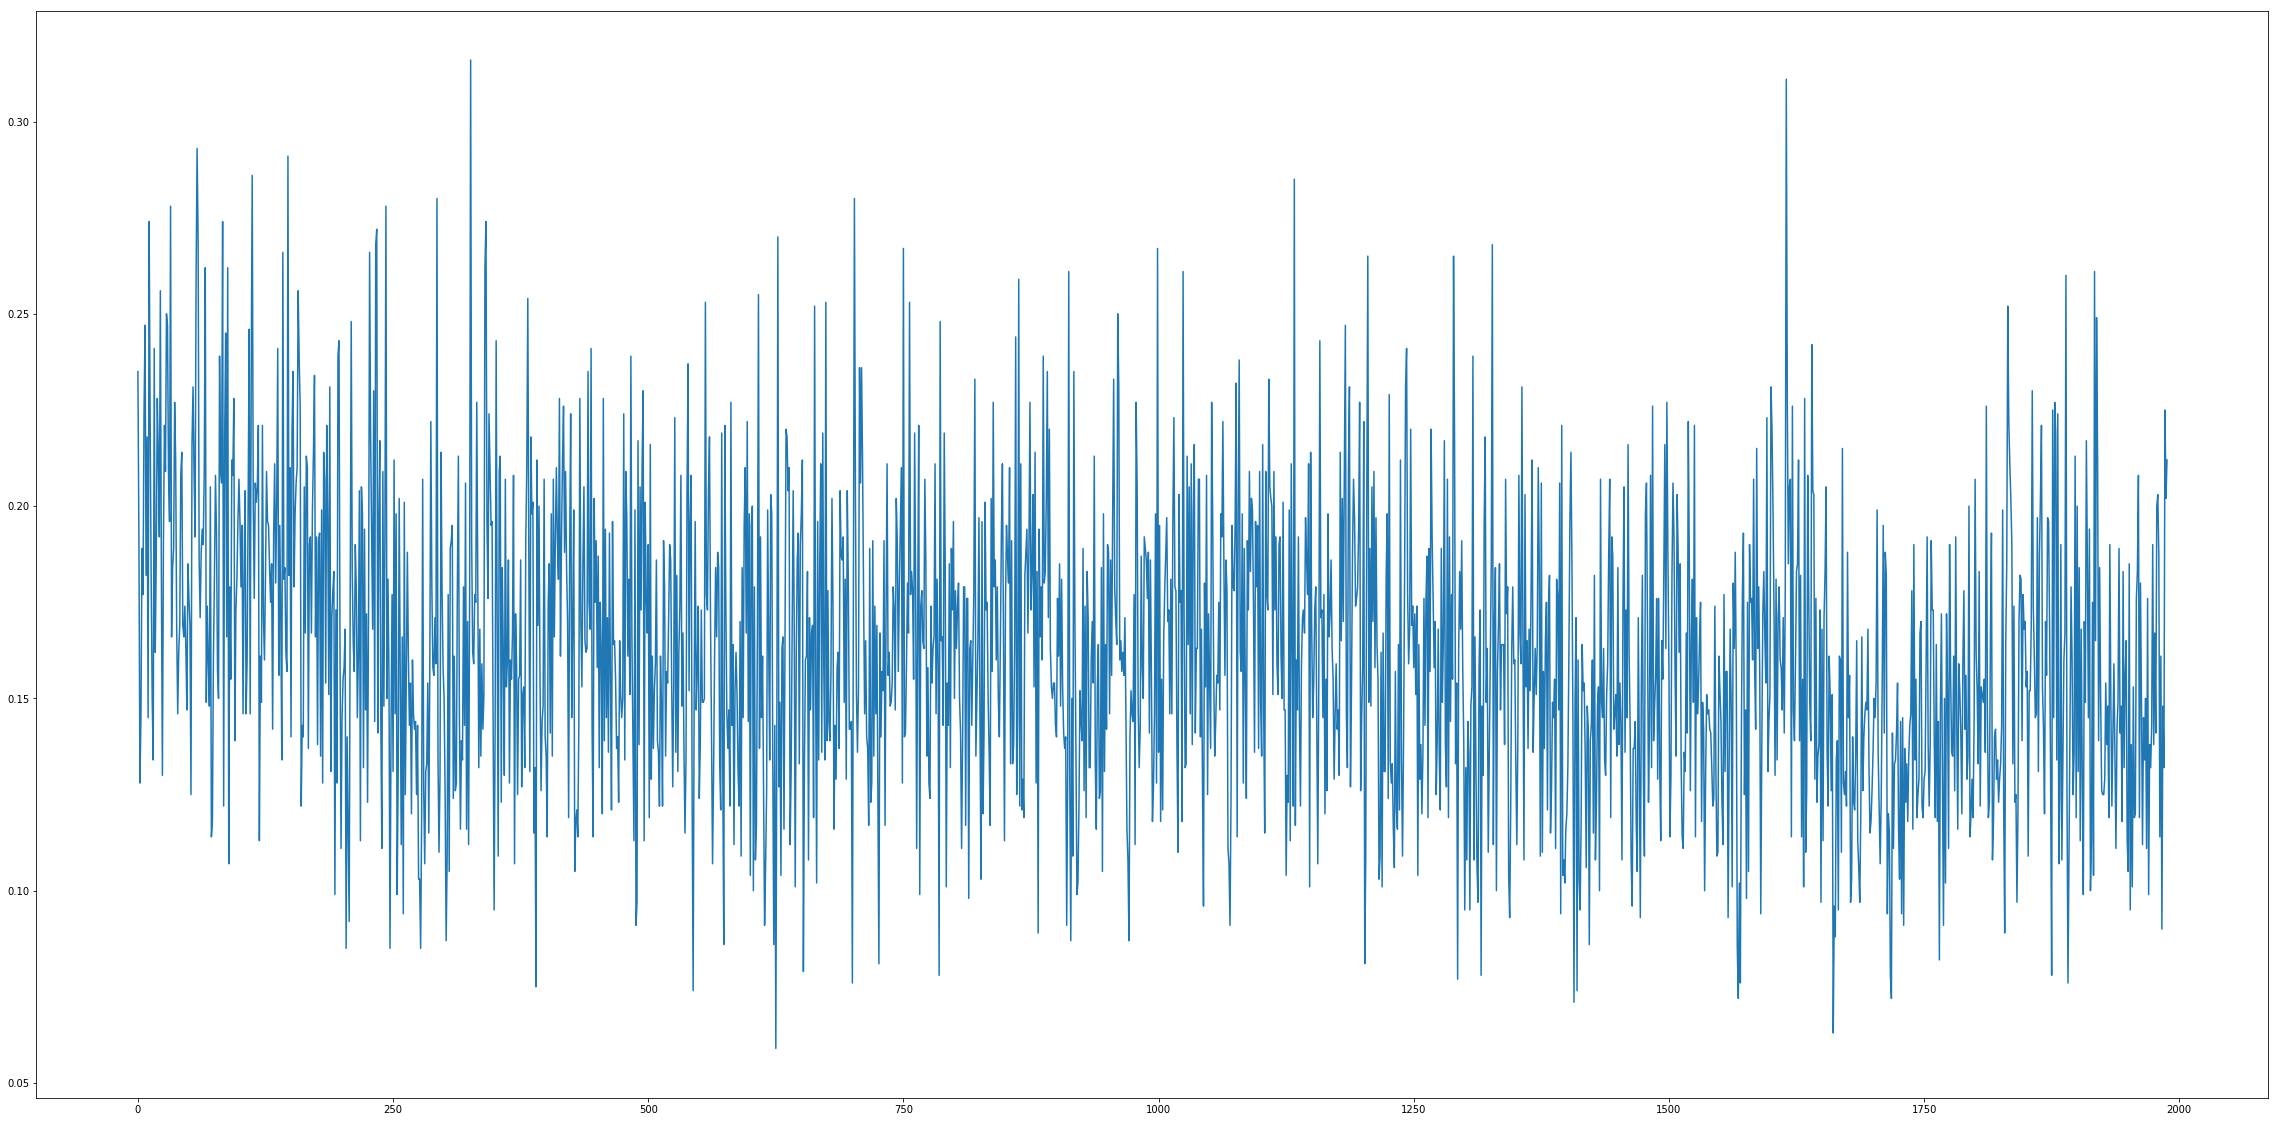

In [32]:
plt.figure(figsize=(40,20))
plt.plot(n)

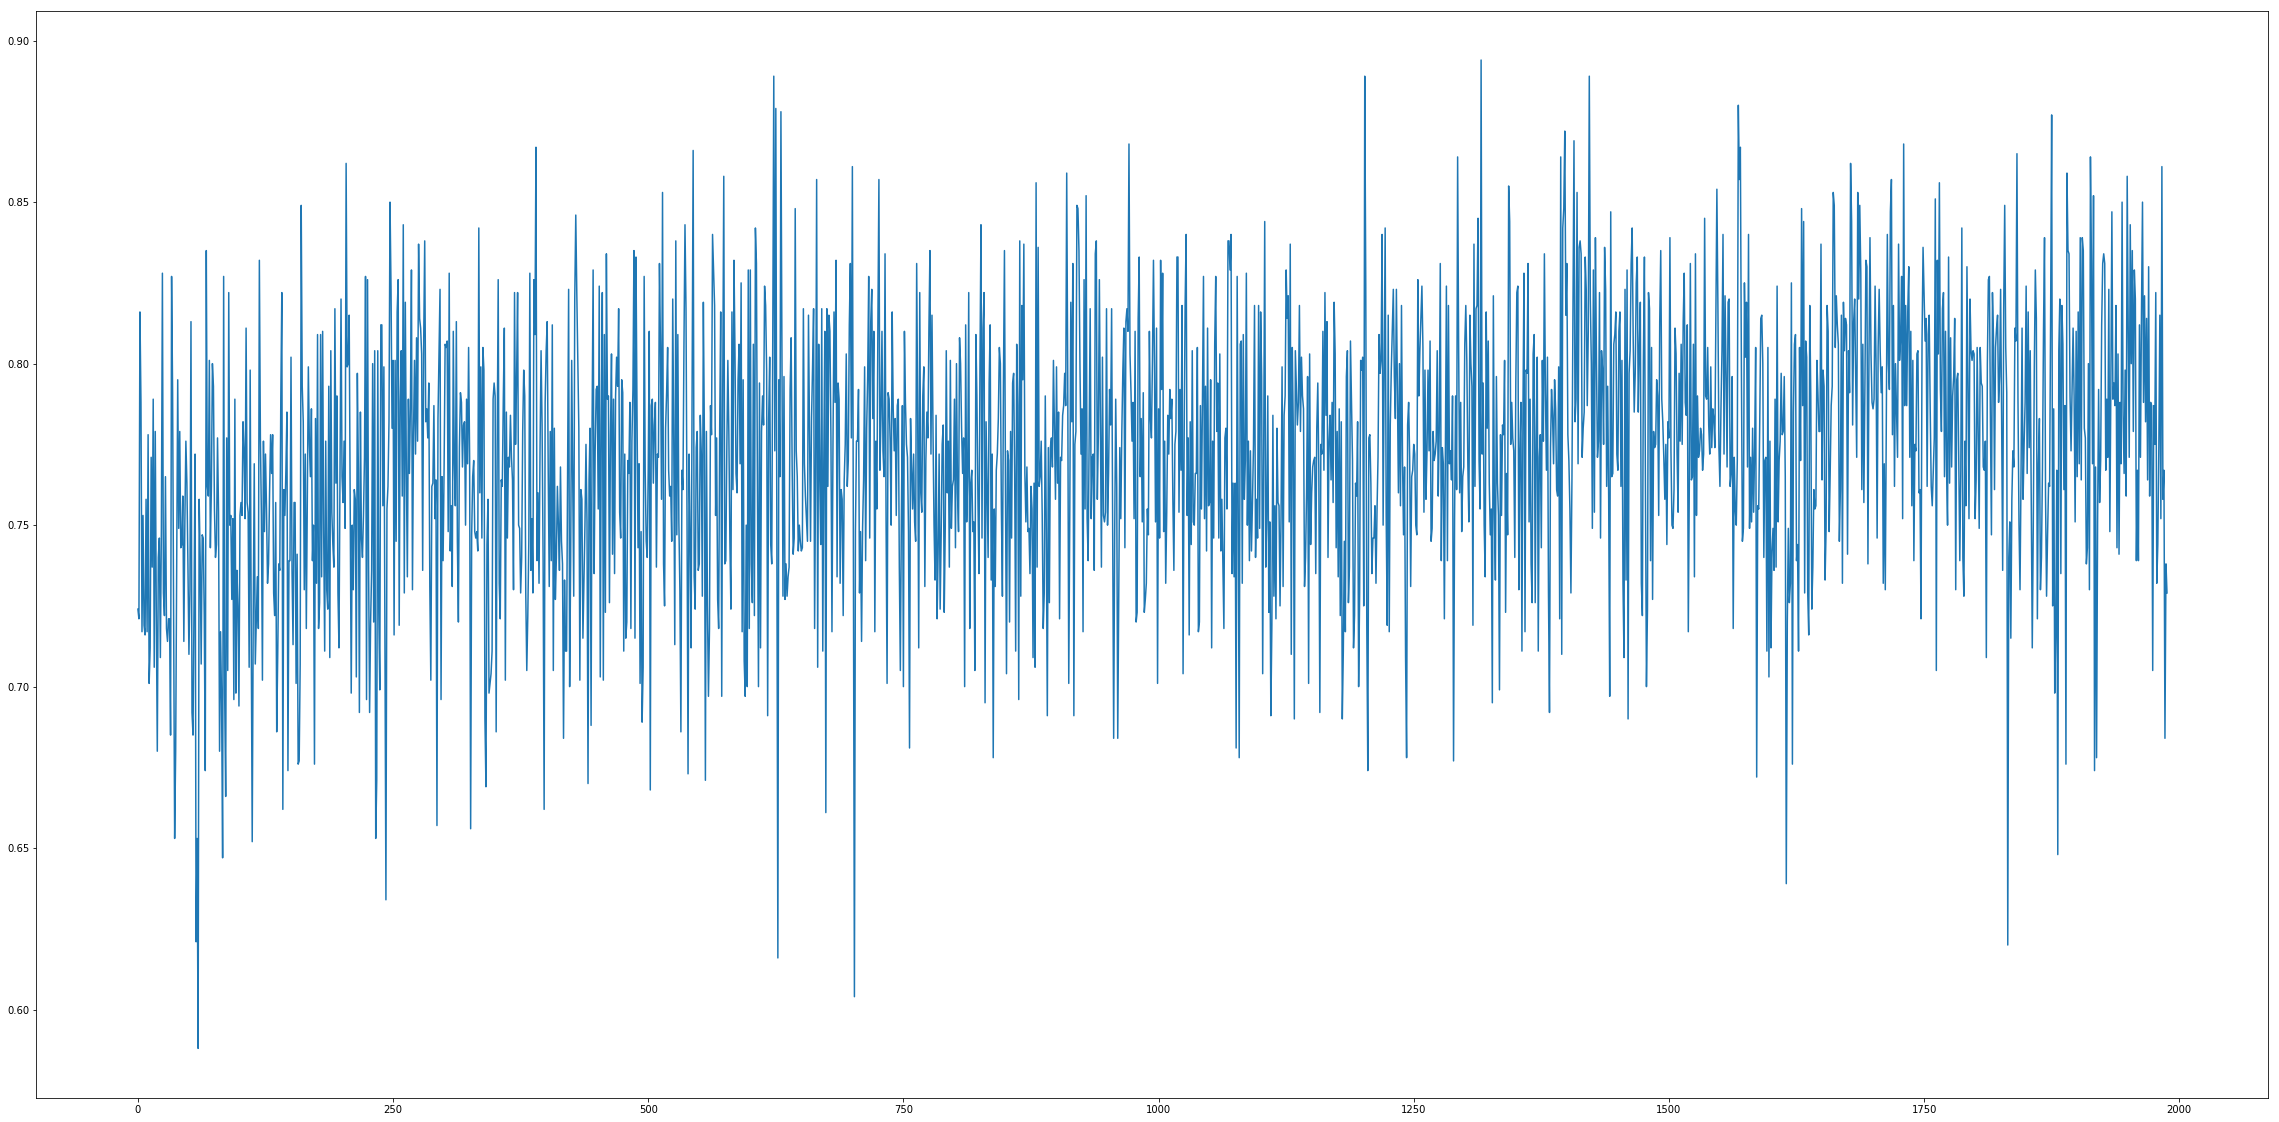

In [33]:
plt.figure(figsize=(40,20))
plt.plot(ne)

In [34]:
X = df
X = np.array(X.drop(['Label'], 1))

# Create a Label column
Y = np.array(df['Label'])

In [35]:
# Split the dataset into 80% training and 20% test datasets
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

## Create a train the model

In [36]:
model = LinearDiscriminantAnalysis().fit(x_train, y_train)

In [37]:
# Show the models predictions
predictions = model.predict(x_test)

In [38]:
predictions

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,

In [39]:
# Check if it matches with y_test dataset
y_test

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,

In [40]:
# Show the model metrics
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       193
           1       0.82      0.88      0.85       205

   micro avg       0.84      0.84      0.84       398
   macro avg       0.84      0.84      0.84       398
weighted avg       0.84      0.84      0.84       398



In [41]:
print(confusion_matrix(y_test,predictions))

[[153  40]
 [ 24 181]]


In [42]:
print(accuracy_score(y_test,predictions))

0.8391959798994975
